<a href="https://colab.research.google.com/github/RandAlsalman8/IR-Project/blob/main/Lotte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install The Dataset

In [1]:
pip install ir_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for warc3-wet-clueweb09: filename=warc3_wet_clueweb09-0.2.5-py3-none-any.whl size=18919 sha256=7e7d38ba7c8d2f8398625165eff1cbd0caaeb426440ea1c73ed4f3ff8266d511
  Stored in directory: /root/.cache/pip/wheels/1a/d7/91/7ffb991df87e62355d945745035470ba2616aa3d83a250b5f9
  Created wheel for zlib-state: filename=zlib_state-0.1.6-cp310-cp310-linux_x86_64.whl size=21163 sha256=2e3af773357bd49ed1ae6a8521b88

#Install the necessary libraries

In [2]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=4a719d38216b3ad7dc40ac80e167c11a406b0c42f91589d01fec473064fb5e10
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [3]:
import ir_datasets
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize
from autocorrect import Speller
spell = Speller(lang='en')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Connecting To My Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset

In [6]:
import ir_datasets
dataset = ir_datasets.load("lotte/lifestyle/dev/search")

for doc in dataset.docs_iter():
    print(doc)
    break
for query in dataset.queries_iter():
    print(query)
    break



GenericDoc(doc_id='0', text="In my experience rabbits are very easy to housebreak. They like to pee and poop in the same place every time, so in most cases all you have to do is put a little bit of their waste in the litter box and they will happily use the litter box. It is very important that if they go somewhere else, miss the edge or kick waste out of the box that you clean it up well and immediately as otherwise those spots will become existing places to pee and poop. When you clean the box, save a little bit of waste and put it in the cleaned box so it smells right to them. For a more foolproof method, you can get a piece of wood soaked with their urine and put that in the box along with droppings or cage them so that they are only in their litter box for a week. Generally, if I try the first method and find that they are not using only the box on the first day, I go for the litter box only for a week method. The wood block works well if you are moving from a hutch outdoors to a 

# Convert Docs, Queries and Qrels to CSV

In [ ]:

queries = pd.DataFrame(dataset.queries_iter())
docs = pd.DataFrame(dataset.docs)
qrels = pd.DataFrame(dataset.qrels_iter())

# Convert docs, queries and qrels to CSV
queries.to_csv("originallotte_queries.csv", index=False)
docs.to_csv("originallotte_docs.csv", index=False)
qrels.to_csv("originallotte_qrels.csv", index=False)

# Saving my files to drive

In [ ]:

original_docs_path = '/content/drive/My Drive/originallotte_docs.csv'
original_qrels_path = '/content/drive/My Drive/originallotte_qrels.csv'
original_queries_path = '/content/drive/My Drive/originallotte_queries.csv'

docs.to_csv(original_docs_path, index=True, index_label='id')
qrels.to_csv(original_qrels_path, index=True, index_label='id')
queries.to_csv(original_queries_path, index=True, index_label='id')


# Text Processing

In [15]:
def dataProcessing(dfText:str):
    # spell correct
    texts = " ".join([spell(w)for w in (word_tokenize(str(dfText)))])
    # To lower case
    texts = dfText.str.lower()

    # Remove punctuation
    trans_table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    texts = [str(word).translate(trans_table) for word in texts]

    # Remove stopwrods
    stop_words = set(stopwords.words('english'))
    texts = [[word for word in q.split() if word not in stop_words] for q in texts]

    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    lemmatized_strings = []
    for text in texts:
        words = word_tokenize(str(text))
        lemmatized_words = []
        for word in text:
            x = pos_tag([word])
            my_pos = wordnet.NOUN
            if x[0][1][0].lower() == 'v':
                my_pos = wordnet.VERB
            lemmatized_words.append(lemmatizer.lemmatize(word, pos = my_pos))
        lemmatized_strings.append(' '.join(lemmatized_words))
    texts = lemmatized_strings


    # Remove Non-alphanumeric Characters
    texts = [re.compile('[^a-zA-Z0-9\s]').sub('', str(word)) for word in texts]

    return texts

# Processing Docs to get the clean docs

In [ ]:
docs= pd.read_csv("originallotte_docs.csv")

docs['text'] = dataProcessing(docs['text'])
docs.to_csv('clean_docs.csv', index=True, index_label='id')

#Processing Queries

In [ ]:
queries = pd.read_csv("originallotte_queries.csv")

queries['text'] = dataProcessing(queries['text'])
queries.to_csv('clean_queries.csv', index=True, index_label='id')

In [ ]:

clean_docs_path = '/content/drive/My Drive/clean_docs.csv'
clean_queries_path = '/content/drive/My Drive/clean_queries.csv'
# Save the DataFrame to a CSV file in Google Drive
docs.to_csv(clean_docs_path, index=True, index_label='id')
queries.to_csv(clean_queries_path, index=True, index_label='id')



#TF-IDF

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path in Google Drive where you want to save the file
original_docs_path = '/content/drive/My Drive/originallotte_docs.csv'
original_qrels_path = '/content/drive/My Drive/originallotte_qrels.csv'
original_queries_path = '/content/drive/My Drive/originallotte_queries.csv'
clean_docs_path = '/content/drive/My Drive/clean_docs.csv'
clean_queries_path = '/content/drive/My Drive/clean_queries.csv'

clean_docs = pd.read_csv(clean_docs_path)
clean_docs = clean_docs.fillna('')
#print(clean_docs['text'].tolist()[:10]);
full_docs = pd.read_csv(original_docs_path)
full_docs = full_docs.fillna('')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['experience rabbit easy housebreak like pee poop place every time case put little bit waste litter box happily use litter box important go somewhere else miss edge kick waste box clean well immediately otherwise spot become exist place pee poop clean box save little bit waste put clean box smell right foolproof method get piece wood soak urine put box along droppings cage litter box week generally try first method find use box first day go litter box week method wood block work well move hutch outdoors litter box indoors indoor cage use cage litter box attach litter box section cage rabbit use waste sure use clay newsprint litter type necessarily good rabbit wood litter okay sure fir important thing clean anywhere accident high side box help avoid kick soil litter box biggest cause failure experience', 'rabbit easily train use litter tray sometimes reliabili

#INDEXING CLEAN DOCS

In [9]:
index = {}
itr = 0
for doc in clean_docs.values:
    for word in str(doc[2]).split():
        if word not in index:
            index[word] = []
        index[word].append(itr)
    itr = itr + 1

In [10]:
import pickle

def save_pkl(instance , path):
  with open(path,"wb") as f:
    pickle.dump(instance,f)

def load_pkl(path):
    with open(path, "rb") as f:
      return pickle.load(f)

#Steps for matching and ranking

In [ ]:
vectorizer = TfidfVectorizer()
cleaned_document = clean_docs['text'].tolist()
tfidf_matrix = vectorizer.fit_transform(cleaned_document)

save_pkl(vectorizer, "/content/drive/My Drive/LotteVectorizer.pkl")
save_pkl(tfidf_matrix, "/content/drive/My Drive/LotteMatrix.pkl")
cleaned_queries = pd.read_csv(clean_queries_path)
docs_names = clean_docs['doc_id'].tolist()

In [12]:
def query_index(query):
    relevant_docs_idx = set()
    for word in query.split():
        if word in index:
            for idx in index[word]:
                relevant_docs_idx.add(idx)
    return relevant_docs_idx

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
import numpy as np
import os

vectorizer = load_pkl("/content/drive/My Drive/LotteVectorizer.pkl")
names = docs_names
tfidf = load_pkl("/content/drive/My Drive/LotteMatrix.pkl")

def getFiles(query):

  cleanedQuery = dataProcessing(query)

  query_tfidf = vectorizer.transform([" ".join(cleanedQuery)])
  vector = query_tfidf.toarray()[0]
  similarity = cosine_similarity(vector.reshape(1,-1),tfidf).flatten()
  sorted_indices = np.argsort(similarity)[::-1]  # Reverse the indices for descending sort
  sorted_documents = [(names[i], similarity[i]) for i in sorted_indices if similarity[i] > 0.3]

  return sorted_documents[:10]


def match():
    queries = dataset.queries
    results = {}

    for query_id,text in dataset.queries_iter():
        results[query_id] = getFiles(pd.Series([text]).astype(str))

    # Save the query_documents dictionary to a pickle file
    with open("/content/drive/My Drive/LotteResults.pkl", 'wb') as file:
        pickle.dump(results, file)

    return
match()
with open("/content/drive/My Drive/LotteResults.pkl", 'rb') as file:
    loaded_results = pickle.load(file)



#MAP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [96]:
def getDocsForQueryById(queryId):

  docs = []
  for value in dataset.qrels_iter():
    if value.query_id==queryId:
      docs.append(value.doc_id)
  return docs

def load_qrels():
    qrels = []
    for value in dataset.qrels_iter():
        qrels.append((value.query_id,value.doc_id, value.relevance))
    return qrels

def calculate_relevant_count(retrieved_docs, query_docs):
    intersect_values = np.intersect1d(retrieved_docs, query_docs)
    matched_count = len(intersect_values)
    return matched_count

def average_precision(retrieved_docs, relevant_docs, k=10):
    total_precisions = 0
    curr_relavant = 1
    if len(relevant_docs) == 0:
        return 0
    if len(retrieved_docs) <= k:
        k = len(retrieved_docs)
    for i in range(k):
        if retrieved_docs[i] in relevant_docs:
            total_precisions += curr_relavant / (i + 1)
            curr_relavant += 1
    matched = calculate_relevant_count(retrieved_docs[:k], relevant_docs)
    if matched == 0:
        return 0
    # print(total_precisions/matched)
    return total_precisions / matched

def calculate_map(queries, qrles):

  total_ap = 0
  for query_id, docs in queries.items():
    intgers_array = [int(x) for x in getDocsForQueryById(query_id)]
    total_ap += average_precision(retrieved_docs=getDocsforResults(queries.get(query_id))[:10],
                                      relevant_docs=intgers_array)
  map_score = total_ap / len(queries)
  return map_score

def getDocsforResults(queryResult):
  docs = []
  for value , similarity in queryResult:
    docs.append(value)
  return docs

def evaluate():
  queries = load_pkl("/content/drive/My Drive/LotteResults.pkl")
  qrels = load_qrels()
  map = calculate_map(queries,qrels)
  print(map)

evaluate()

417
0.2679832324616497


#Clustring

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
cleandocs=pd.read_csv('/content/drive/MyDrive/clean_docs.csv')

In [ ]:
cleandocs.head()

,id,doc_id,text
0,0,0,experience rabbit easy housebreak like pee poo...
1,1,1,rabbit easily train use litter tray sometimes ...
2,2,2,could multitude thing lack exercise play big r...
3,3,3,lot success crate training dog relieve sleep e...
4,4,4,see dog whisperer dog sense anxiety owner firs...


In [ ]:
cleandocs.shape

(268893, 3)

In [ ]:
cleandocs['text'] = cleandocs['text'].fillna('')

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(cleandocs['text'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
cleandocs['cluster'] = kmeans.labels_
print(cleandocs.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   id  doc_id                                               text  cluster
0   0       0  experience rabbit easy housebreak like pee poo...        0
1   1       1  rabbit easily train use litter tray sometimes ...        0
2   2       2  could multitude thing lack exercise play big r...        0
3   3       3  lot success crate training dog relieve sleep e...        0
4   4       4  see dog whisperer dog sense anxiety owner firs...        0


In [ ]:
cleandocs['cluster'].value_counts()

cluster
0    171297
4     30546
1     24766
3     22284
2     20000
Name: count, dtype: int64

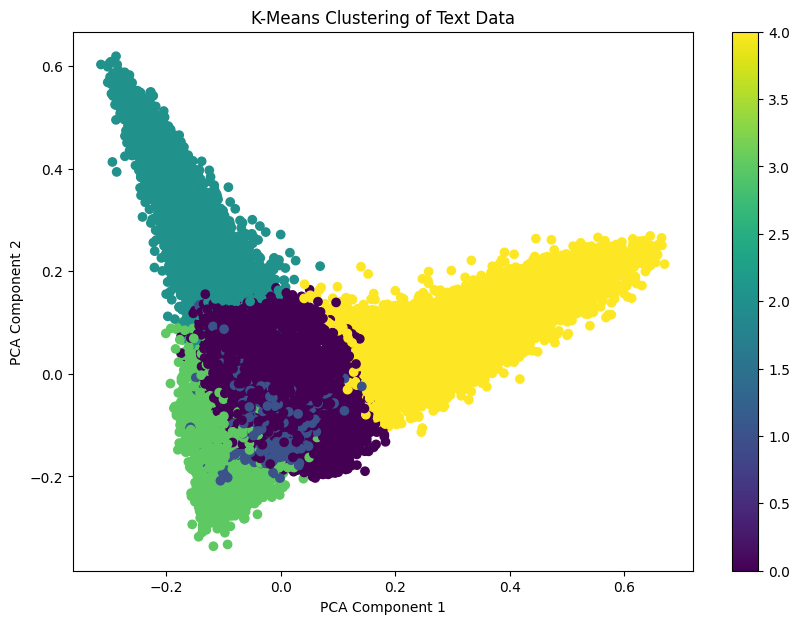

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to try
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Print WCSS values
print("WCSS values for each k:", wcss)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


WCSS values for each k: [258793.9047929647, 256298.10444086447, 254216.52577857478, 252591.4807900663, 251109.98544919124, 249694.28123396024, 248435.85669055994, 247295.0264647071, 246313.86295201382, 245241.45175805327]


<ipython-input-39-4bdacfdf1443>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_values, wcss, 'bo-', marker='o')


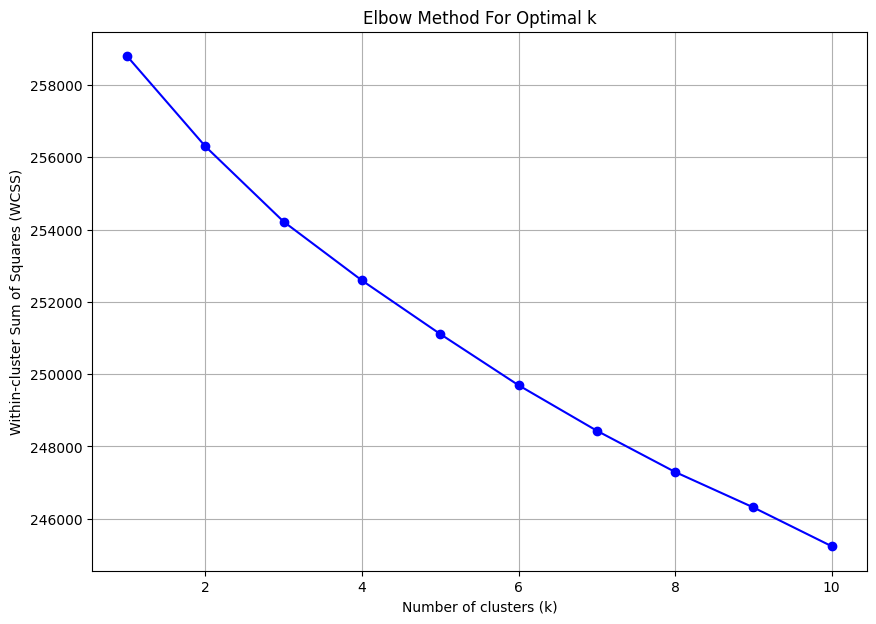

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, wcss, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


   id  doc_id                                               text  cluster
0   0       0  experience rabbit easy housebreak like pee poo...        9
1   1       1  rabbit easily train use litter tray sometimes ...        5
2   2       2  could multitude thing lack exercise play big r...        4
3   3       3  lot success crate training dog relieve sleep e...        4
4   4       4  see dog whisperer dog sense anxiety owner firs...        4


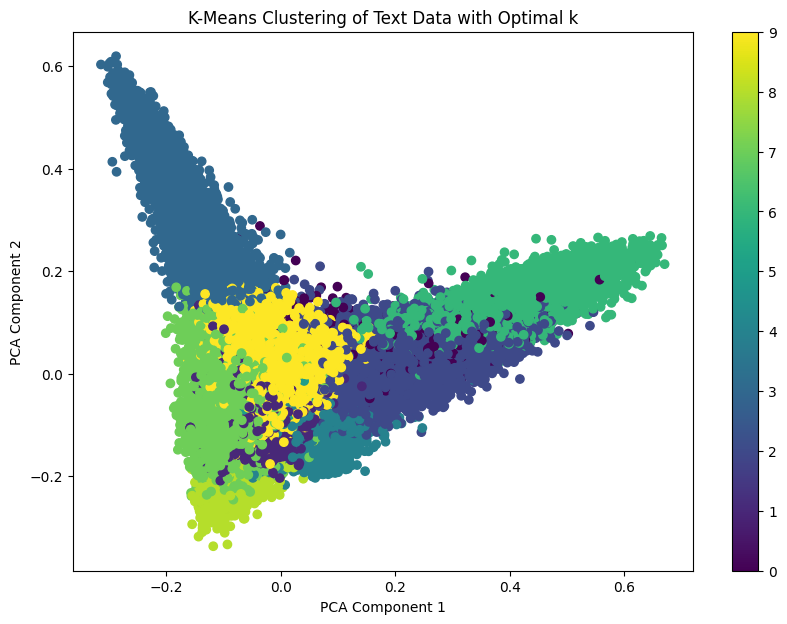

In [ ]:
 the Elbow Method, choose the optimal number of clusters (e.g., 5)
optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)


cleandocs['cluster'] = kmeans.labels_
print(cleandocs.head())

# Visualize the clusters
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Text Data with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
cleandocs['cluster'].value_counts()

cluster
9    126316
7     26559
2     23869
1     23679
3     19265
4     18892
8     12652
6      8658
0      5141
5      3862
Name: count, dtype: int64

#Topic Detection

In [54]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

# Load data
data = pd.read_csv('/content/drive/MyDrive/clean_docs.csv')

data= data.dropna(subset=['text'])

print(data['text'].isnull().sum())


0


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['text'])


In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation


#range of topics
topics_range = range(2, 10)
perplexity_values = []
log_likelihood_values = []

# Fit the LDA model with different numbers of topics
for n_topics in topics_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    perplexity_values.append(lda.perplexity(dtm))
    log_likelihood_values.append(lda.score(dtm))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(topics_range, perplexity_values, marker='o')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

plt.subplot(1, 2, 2)
plt.plot(topics_range, log_likelihood_values, marker='o')
plt.title('Log Likelihood vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Log Likelihood')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42) # You can change the number of topics
lda.fit(dtm)


LatentDirichletAllocation(random_state=42)

In [ ]:
# Function to display topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Display topics
num_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), num_top_words)


Topic 0:
plant cat water tree soil like grow leaf pot root
Topic 1:
bike wheel brake tire use chain need road speed make
Topic 2:
child time make like thing want need try dog know
Topic 3:
water air use heat pipe valve pressure need temperature drain
Topic 4:
play music use time learn like note instrument sound make
Topic 5:
use make need foot concrete soil like bag good want
Topic 6:
wire switch ground circuit use breaker box neutral cable light
Topic 7:
use cut make wall screw hole need remove like work
Topic 8:
chord note string scale key major use play sound minor
Topic 9:
car engine battery power oil fuel use vehicle start time


#Query Refinement

In [ ]:
import csv
import json
import nltk
from nltk.corpus import wordnet


def refine_query(input_query):
    # Tokenize the input query
    query_tokens = nltk.word_tokenize(input_query)


    refined_query_set = set(query_tokens)

    for token in query_tokens:
        synsets = wordnet.synsets(token)
        for synset in synsets:
            for lemma in synset.lemmas():
                # Add the lemma to the refined query if it's not the same as the original token
                if lemma.name() != token:
                    refined_query_set.add(lemma.name())

    # Return the refined query as a string
    return " ".join(refined_query_set)


def refineQueriesFile(input_jsonl, output_csv):

    with open(input_jsonl, 'r', newline='') as jsonl_file, open(output_csv, 'w', newline='') as csv_file:

        csv_writer = csv.writer(csv_file)

        for line in jsonl_file:
            # Parse JSON object from the current line
            json_item = json.loads(line)
            query_id = json_item['qid']
            query_text = json_item['query']

            # Apply query refinement to the text column (query)
            refined_query_text = refine_query(query_text)

            # Write the ID and refined query to the output file
            csv_writer.writerow([query_id, refined_query_text])


    return output_csv

# Example
input_jsonl_path = '/content/drive/MyDrive/qas.search.jsonl'  # Ensure this file exists in your working directory
output_csv_path = '/content/drive/MyDrive/refined_query.csv'

# Process the file and refine queries
refineQueriesFile(input_jsonl_path, output_csv_path)


'/content/drive/MyDrive/refined_query.csv'

In [ ]:
 find the original queries
def find_original_queries(refined_query, input_jsonl_path, output_csv_path, num_queries):
    # Create a dictionary to map refined queries to original queries
    refined_to_original = {}

    with open(input_jsonl_path, 'r', newline='') as jsonl_file:
        for line in jsonl_file:
            json_item = json.loads(line)
            query_text = json_item['query']
            refined_query_text = refine_query(query_text)
            if refined_query_text not in refined_to_original:
                refined_to_original[refined_query_text] = []
            refined_to_original[refined_query_text].append(query_text)

    # Find and return the matching original queries
    original_queries = []
    with open(output_csv_path, 'r', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            qid, refined_query_text = row
            if refined_query in refined_query_text:
                if refined_query_text in refined_to_original:
                    original_queries.extend(refined_to_original[refined_query_text])
                    if len(original_queries) >= num_queries:
                        break

    return original_queries[:num_queries]



input_jsonl_path = '/content/drive/MyDrive/qas.search.jsonl'
output_csv_path = '/content/drive/MyDrive/refined_query.csv'



# Example usage
refined_query_example = "how are  "
num_queries = 7
original_queries = find_original_queries(refined_query_example, input_jsonl_path, output_csv_path, num_queries)
print(f"Original queries for the refined query '{refined_query_example}':")
for query in original_queries:
    print(query)

Original queries for the refined query 'how are  ':
